# pop-cosmos: Galaxy Catalogue Data Analysis

**Zenodo Link:** https://doi.org/10.5281/zenodo.15622325


This notebook demonstrates how to work with the pop-cosmos mock galaxy catalog data products from the paper "pop-cosmos: Insights from generative modeling of a deep, infrared-selected galaxy population" by Thorp et al. (2025).

The mock galaxy catalogues can be downloaded from the Zenodo link above.

## Dataset Overview

The dataset contains two mock galaxy catalogs, each with 2 million galaxies sampled from the pop-cosmos generative model calibrated on COSMOS2020 data:
- `mock_catalog_Ch1_26.h5`: IRAC Ch.1 < 26 magnitude limit
- `mock_catalog_r_25.h5`: r < 25 magnitude limit

### Citation
If you use these data, please cite:
- J. Alsing et al. (2024). ApJS, 274, 12. [arXiv:2402.00935](https://arxiv.org/abs/2402.00935)
- S. Thorp et al. (2025). ApJ, submitted.

## Installation Requirements

Make sure you have the required packages installed:

In [1]:
# Uncomment to install required packages
# !pip install h5py numpy matplotlib pandas seaborn

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

## Loading the Data

First, let's open one of the HDF5 files and explore its structure:

In [3]:
# Open the HDF5 file
filename = "../mock_catalog_Ch1_26.h5"  # Change this to your file path

try:
    f = h5py.File(filename, "r")
    print(f"Successfully opened {filename}")
    # Get file size using os.path
    file_size_gb = os.path.getsize(filename) / (1024**3)
    print(f"File size: {file_size_gb:.2f} GB")
except FileNotFoundError:
    print(f"File {filename} not found. Please download it from the Zenodo record.")
    print("For demonstration, we'll show the expected structure.")
    f = None

Successfully opened ../mock_catalog_Ch1_26.h5
File size: 1.12 GB


## Data Structure Exploration

Let's examine the structure and metadata of the catalog:

In [4]:
# Explore the main datasets
if f is not None:
    print("Available datasets:")
    for key in f.keys():
        dataset = f[key]
        print(f"  {key:20} | Shape: {dataset.shape} | Dtype: {dataset.dtype}")
else:
    print("Expected datasets:")
    expected_datasets = {
        "fluxes": "(2000000, 26) | Noisy model fluxes in Mgy",
        "fluxes_noiseless": "(2000000, 26) | Noiseless model fluxes in Mgy", 
        "magnitudes_log": "(2000000, 26) | Noisy log magnitudes (AB system)",
        "magnitudes_asinh": "(2000000, 26) | Noisy asinh magnitudes (AB system)",
        "sps_parameters": "(2000000, 16) | Base SPS model parameters",
        "derived_parameters": "(2000000, 4) | Derived model parameters",
        "mass_complete": "(2000000,) | Mass completeness boolean",
        "mass_995": "(2000000,) | Below 99.5th percentile mass boolean"
    }
    for key, desc in expected_datasets.items():
        print(f"  {key:20} | {desc}")

Available datasets:
  derived_parameters   | Shape: (2000000, 4) | Dtype: float32
  flux_sigmas          | Shape: (2000000, 26) | Dtype: float32
  fluxes               | Shape: (2000000, 26) | Dtype: float32
  fluxes_noiseless     | Shape: (2000000, 26) | Dtype: float32
  magnitudes_asinh     | Shape: (2000000, 26) | Dtype: float32
  magnitudes_log       | Shape: (2000000, 26) | Dtype: float32
  mass_995             | Shape: (2000000,) | Dtype: bool
  mass_complete        | Shape: (2000000,) | Dtype: bool
  sps_parameters       | Shape: (2000000, 16) | Dtype: float32


In [5]:
# Explore the attributes (metadata)
if f is not None:
    print("\nFile attributes (metadata):")
    for key in f.attrs.keys():
        value = f.attrs[key]
        if isinstance(value, bytes):
            value = value.decode('utf-8')
        print(f"  {key:25} | {value}")
else:
    print("\nExpected attributes include:")
    print("  created, band_list, sps_parameter_list, derived_parameter_list,")
    print("  reference_band, magnitude_unit, flux_unit, etc.")


File attributes (metadata):
  band_list                 | ['u' 'g' 'r' 'i' 'z' 'y' 'Y' 'J' 'H' 'Ks' 'IB427' 'IB464' 'IA484' 'IB505'
 'IA527' 'IB574' 'IA624' 'IA679' 'IB709' 'IA738' 'IA767' 'IB827' 'NB711'
 'NB816' 'Ch1' 'Ch2']
  created                   | 2025-04-03_09-38-34
  derived_parameter_list    | ['age' 'log10M_remain' 'log10SFR' 'log10sSFR']
  flux_softening            | [1.0796025e-12 3.0850505e-12 5.0810960e-12 8.7932684e-13 2.9128664e-12
 4.0592320e-12 2.6236728e-12 4.9892664e-12 3.3344517e-12 1.1464796e-12
 5.2633565e-12 3.9987060e-12 6.6203090e-12 4.7184913e-12 6.1633790e-12
 1.1476493e-12 4.2965584e-12 6.2214015e-12 1.8217973e-12 4.1181610e-12
 8.2312600e-12 8.9092550e-12 1.0833998e-11 7.9285300e-12 3.2293492e-12
 3.4518978e-12]
  flux_unit                 | maggies
  magnitude_unit            | AB
  reference_band            | Ch1
  reference_band_limit_asinh | 25.99292528699868
  reference_band_limit_log  | 26.0
  sps_parameter_list        | ['log10M_formed' 'log10Z'

## Photometric Bands

The catalog contains photometry in 26 bands from various surveys:

In [6]:
# Define the band information
band_info = f.attrs["band_list"]
print("Photometric bands in the catalog:")
print(band_info)

Photometric bands in the catalog:
['u' 'g' 'r' 'i' 'z' 'y' 'Y' 'J' 'H' 'Ks' 'IB427' 'IB464' 'IA484' 'IB505'
 'IA527' 'IB574' 'IA624' 'IA679' 'IB709' 'IA738' 'IA767' 'IB827' 'NB711'
 'NB816' 'Ch1' 'Ch2']


## SPS Parameters

The catalog includes 16 base stellar population synthesis (SPS) parameters:

    log10M_formed - "stellar mass formed (log10 solar masses)",
    log10Z", "stellar metallicity (log10 solar metallicity)",
    log10sfr_ratio1, "SFR ratio between bin 1 and 2 of SFH",
    log10sfr_ratio2, "SFR ratio between bin 2 and 3 of SFH",
    log10sfr_ratio3, "SFR ratio between bin 3 and 4 of SFH",
    log10sfr_ratio4, "SFR ratio between bin 4 and 5 of SFH",
    log10sfr_ratio5, "SFR ratio between bin 5 and 6 of SFH",
    log10sfr_ratio6, "SFR ratio between bin 6 and 7 of SFH",
    dust2, "optical depth of diffuse dust",
    dust_index, "power law index of diffuse dust attenuation law",
    dust1_fraction, "ratio of birth cloud to diffuse dust attenuation",
    lnfAGN, "ratio of AGN bolometric luminosity to stellar luminosity",
    lntauAGN, "optical depth of AGN dust torus",
    log10Zgas, "gas-phase metallicity (log10 solar metallicity)",
    log10Ugas, "gas ionization",
    z, "redshift"

In [7]:
# Define SPS parameter information
sps_params = f.attrs['sps_parameter_list']
print("SPS parameters in the catalog:")
print(sps_params)

SPS parameters in the catalog:
['log10M_formed' 'log10Z' 'log10SFR_ratio1' 'log10SFR_ratio2'
 'log10SFR_ratio3' 'log10SFR_ratio4' 'log10SFR_ratio5' 'log10SFR_ratio6'
 'dust2' 'dust_index' 'dust1_fraction' 'lnfAGN' 'lntauAGN' 'log10Zgas'
 'log10Ugas' 'z']


## Derived Parameters

The catalog also includes 4 derived parameters:

In [8]:
# Define derived parameter information
derived_params = f.attrs['derived_parameter_list']
print("Derived parameters in the catalog:")
print(derived_params)

Derived parameters in the catalog:
['age' 'log10M_remain' 'log10SFR' 'log10sSFR']


## Basic Data Analysis Examples

Now let's demonstrate some basic analysis of the catalog data:

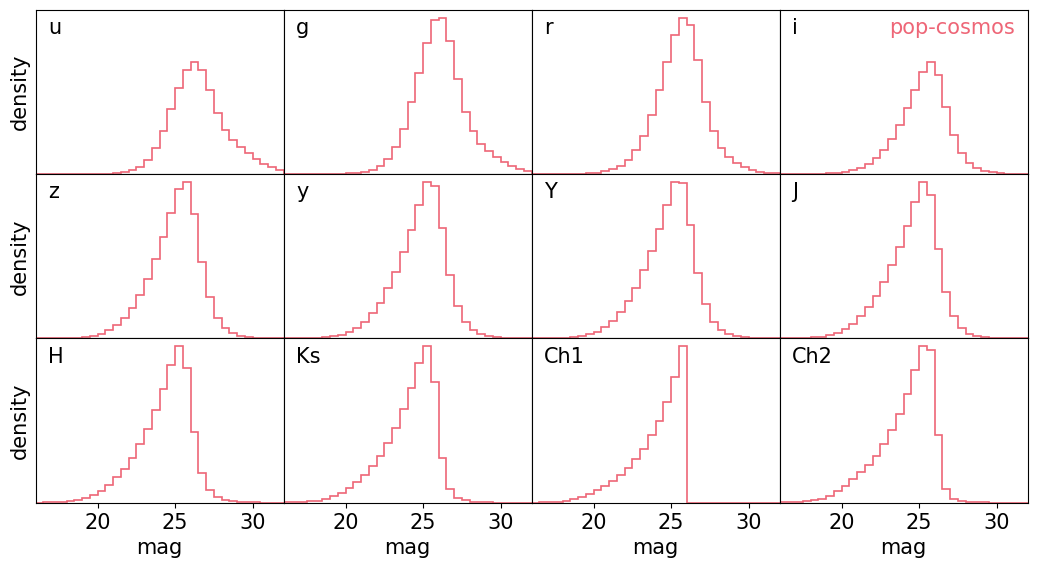

In [9]:
#Plot the broadband magnitudes(logarithmic) in the catalogue
noisy_magnitudes_selected = f["magnitudes_log"][:]

plt.rcParams.update({"font.size": 15})
mag_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, -2, -1]

x_bins = np.linspace(16, 32, 33)
hist_color = "#EE6677"
figsize = (12.8, 6.4)
xlim = (16, 32)
xticks = [20, 25, 30]

fig, axes = plt.subplots(3, 4, figsize=figsize)
axes = axes.flatten()

# Loop through all channels for a histogram plot
for i, mag_idx in enumerate(mag_list):
    ax = axes[i]
    
    ax.hist(noisy_magnitudes_selected[:, mag_idx], 
            color=hist_color, bins=x_bins, histtype="step", 
            linewidth=1.2, density=True)
    
    # Filter labels
    ax.text(0.05, 0.95, band_info[mag_idx], 
            transform=ax.transAxes, verticalalignment='top')
    
    if i == 3:
        ax.text(0.95, 0.95, "pop-cosmos", transform=ax.transAxes, 
                verticalalignment='top', horizontalalignment="right", 
                color=hist_color)
    
    if i in [0, 3]: 
        ax.set_ylim(0, ax.get_ylim()[1] * 1.4)

    if i % 4 == 0: 
        ax.set_ylabel('density')
    ax.set_yticks([])
    
    ax.set_xlim(xlim)
    if i > 7: 
        ax.set_xlabel('mag')
        ax.set_xticks(xticks)
    else:
        ax.set_xticks([])

plt.subplots_adjust(hspace=0, wspace=0)
plt.show()

## Cleanup

Don't forget to close the HDF5 file when you're done:

In [10]:
# Close the HDF5 file
if f is not None:
    f.close()
    print("HDF5 file closed successfully.")
else:
    print("No HDF5 file was opened in this session.")

HDF5 file closed successfully.
